In [8]:
!pip install -q keras


In [73]:
import keras
from keras.datasets import cifar10
from keras import models
from keras import layers
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [58]:
from keras import regularizers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu',
input_shape=(32 * 32 * 3,)))
network.add(layers.Dense(40, kernel_regularizer=regularizers.l2(0.001),
activation='sigmoid'))
network.add(layers.Dense(20, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
network.add(layers.Dense(10, activation='softmax'))


In [59]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [60]:
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / 255

In [61]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [62]:
history =network.fit(train_images, train_labels, epochs=30, batch_size=256)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.1583 - loss: 2.3154
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.2965 - loss: 1.9964
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.3406 - loss: 1.8685
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.3679 - loss: 1.7956
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3853 - loss: 1.7501
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.4080 - loss: 1.6983
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.4176 - loss: 1.6679
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.4289 - loss: 1.6377
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.4417 - loss: 1.5999
Epoch 10/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.4541 - loss: 1.5694
Epoch 11/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.4615 - loss: 1.5614
Epoch 12/20
196/196 ━━━━━━━━━━━━━━━

In [63]:
test_loss, test_acc = network.evaluate(test_images, test_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4937 - loss: 1.4931


ADDITIONAL AREA

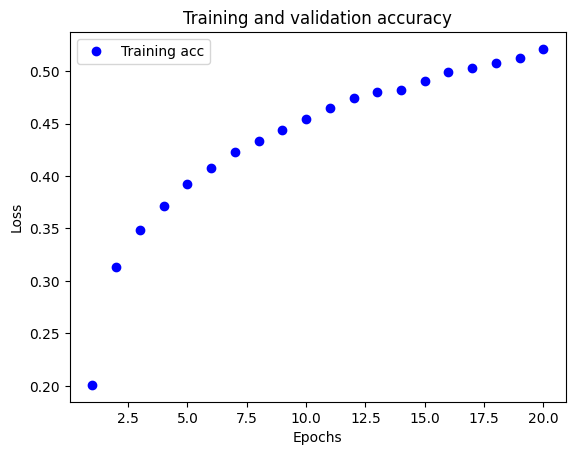

In [69]:
import matplotlib.pyplot as plt
history_dict = history.history
epochs = range(1, len(loss_values) + 1)
accuracy = history_dict['accuracy']
plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.title('Training  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#show accuracy

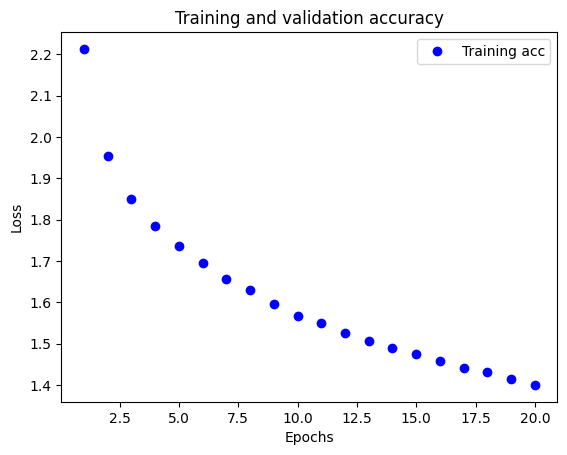

In [70]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.title('Training  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#show loss

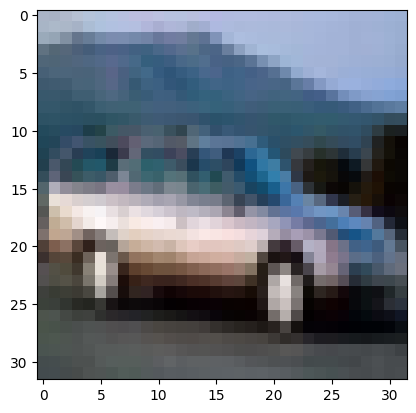

In [74]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show()